In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import scipy.stats

In [ ]:
df = pd.read_excel("NASDAQ Realized Volatility.xlsx",index_col='Date',parse_dates=True)

In [ ]:
df.drop(columns=["US Financial Turbulence"], inplace=True)
df.head()

,Realised,Market Excess Return (MKT),Short Term Reversal Factor (RMW),S&P 500 Dividend Yield,Measure of default risk of corporate bonds:\ndifference of BAA and AAA bond yields
Date,,,,,
2017-11-02,0.004994,0.06,-0.25,1.87,0.007000
2017-11-03,0.006088,0.31,-0.15,1.87,0.007006
2017-11-06,0.001982,0.06,-0.64,1.87,0.007011
2017-11-07,0.004198,-0.20,0.46,1.87,0.007017
2017-11-08,0.003317,0.12,0.56,1.87,0.007022


# Hyperparameter Search

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
scaler = MinMaxScaler()
from numpy.random import seed
from random import randrange

In [ ]:
n_inputs = [21,63,84,126,189,252]
n_neurons = [14,42,56,84,126,168]
epochs=[3,5,10,15]
dropouts=[0,0.2,0.4]
losses=['mse','mae','huber_loss']
RMSE = []
Accuracy = []

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
22/22 [==============================] - 8s 7ms/step - loss: 0.1259 - acc: 0.0000e+00
Epoch 2/5
22/22 [==============================] - 0s 7ms/step - loss: 0.0962 - acc: 0.0000e+00
Epoch 3/5
22/22 [==============================] - 0s 7ms/step - loss: 0.0820 - acc: 0.0000e+00
Epoch 4/5
22/22 [==============================] - 0s 7ms/step - loss: 0.0786 - acc: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 28ms/step
Epoch: 5 | Inputs: 63 | Nodes: 42 | Dropout: 0.4 | Loss: mae
RMSE: 0.0038952664964466747 | Accuracy: 49.36115884958868
Epoch 1/15
20/20 [==============================] - 3s 10ms/step - loss: 0.2849 - acc: 0.0000e+00
Epoch 2/15
20/20 [==============================] - 0s 8ms/step - loss: 0.2017 - acc: 0.0000e+00
Epoch 3/15
20/20 [==============================] - 0s 9ms/step - loss: 0.1439 - acc: 0.0000e+00
Epoch 4/15
20/20 [==============================] - 0s 8ms/step - loss: 0.1225 - acc: 0.0000e+00
Epoch 5/15
20/20 [============================

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/5
22/22 [==============================] - 2s 9ms/step - loss: 0.0163 - acc: 0.0000e+00
Epoch 2/5
22/22 [==============================] - 0s 8ms/step - loss: 0.0097 - acc: 0.0000e+00
Epoch 3/5
22/22 [==============================] - 0s 7ms/step - loss: 0.0083 - acc: 0.0000e+00
Epoch 4/5
22/22 [==============================] - 0s 8ms/step - loss: 0.0082 - acc: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 34ms/step
Epoch: 5 | Inputs: 63 | Nodes: 126 | Dropout: 0.4 | Loss: mse
RMSE: 0.004504762434474882 | Accuracy: 54.07703708016987
Epoch 1/15
22/22 [==============================] - 3s 8ms/step - loss: 0.0241 - acc: 0.0000e+00
Epoch 2/15
22/22 [==============================] - 0s 8ms/step - loss: 0.0192 - acc: 0.0000e+00
Epoch 3/15
22/22 [==============================] - 0s 8ms/step - loss: 0.0137 - acc: 0.0000e+00
Epoch 4/15
22/22 [==============================] - 0s 8ms/step - loss: 0.0094 - acc: 0.0000e+00
Epoch 5/15
22/22 [=============================

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
21/21 [==============================] - 2s 7ms/step - loss: 0.3058 - acc: 0.0000e+00
Epoch 2/3
21/21 [==============================] - 0s 7ms/step - loss: 0.0787 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 25ms/step
Epoch: 3 | Inputs: 84 | Nodes: 14 | Dropout: 0.2 | Loss: mse
RMSE: 0.04365866200146632 | Accuracy: -542.1161498000359
Epoch 1/5
21/21 [==============================] - 2s 11ms/step - loss: 0.0707 - acc: 0.0000e+00
Epoch 2/5
21/21 [==============================] - 0s 10ms/step - loss: 0.0582 - acc: 0.0000e+00
Epoch 3/5
21/21 [==============================] - 0s 9ms/step - loss: 0.0497 - acc: 0.0000e+00
Epoch 4/5
21/21 [==============================] - 0s 8ms/step - loss: 0.0546 - acc: 0.0000e+00
Epoch 5/5
1/1 [==============================] - 0s 29ms/step
Epoch: 5 | Inputs: 84 | Nodes: 168 | Dropout: 0 | Loss: mae
RMSE: 0.006343875858204447 | Accuracy: 35.813457055288744
Epoch 1/5
20/20 [==============================] - 3s 14ms/ste

In [ ]:
for m in range (5):
    i=randrange(6)
    h=randrange(6)
    k=randrange(4)
    l=randrange(3)
    m=randrange(3)
    seed(1052023)
    train = df.iloc[:int(len(df['Realised'])*0.6)]
    validation = df.iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df.iloc[int(len(df['Realised'])*0.8):]
    scaler.fit(train)
    scaled_train_input = scaler.transform(train)
    scaled_validation_input = scaler.transform(validation)
    scaled_test_input = scaler.transform(test)
    train = df["Realised"].iloc[:int(len(df['Realised'])*0.6)]
    validation = df["Realised"].iloc[int(len(df['Realised'])*0.6):int(len(df['Realised'])*0.8)]
    test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
    train = train.array.reshape(-1, 1)
    validation = validation.array.reshape(-1, 1)
    test = test.array.reshape(-1, 1)
    scaler.fit(train)
    scaled_train_target = scaler.transform(train)
    scaled_validation_target = scaler.transform(validation)
    scaled_test_target = scaler.transform(test)
    n_features = 5
    n_input = n_inputs[i]
    generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
    model = Sequential()
    model.add(LSTM(n_neurons[h], activation='tanh', input_shape=(n_input, n_features)))
    model.add(Dropout(dropouts[l]))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss=losses[m],metrics='acc')
    model.fit(generator,epochs=epochs[k], shuffle=False)
    last_train_batch = scaled_train_input[-n_input:]
    last_train_batch = last_train_batch.reshape((1, n_input, n_features))
    a = np.array(scaled_validation_input)
    test_predictions = []
    first_eval_batch = scaled_train_input[-n_input:]
    current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
    for j in range(len(scaled_validation_input)):
            # get the prediction value for the first batch
        current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
        test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
        current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
    true_predictions = scaler.inverse_transform(test_predictions)
    RMSE=(np.sum(np.sqrt((validation-true_predictions)**2))/len(validation))
    Accuracy=((1-(np.sum(np.sqrt((validation-true_predictions)**2)/validation)/len(validation)))*100)
    print(f"Epoch: {epochs[k]} | Inputs: {n_inputs[i]} | Nodes: {n_neurons[h]} | Dropout: {dropouts[l]} | Loss: {losses[m]}")
    print(f"RMSE: {RMSE} | Accuracy: {Accuracy}")

Epoch 1/3
22/22 [==============================] - 2s 8ms/step - loss: 0.0166 - acc: 0.0000e+00
Epoch 2/3
22/22 [==============================] - 0s 6ms/step - loss: 0.0087 - acc: 0.0000e+00
Epoch 3/3
1/1 [==============================] - 0s 19ms/step
Epoch: 3 | Inputs: 63 | Nodes: 14 | Dropout: 0.2 | Loss: huber_loss
RMSE: 0.003413976114178012 | Accuracy: 58.16300142010596
Epoch 1/10
20/20 [==============================] - 3s 11ms/step - loss: 0.0120 - acc: 0.0000e+00
Epoch 2/10
20/20 [==============================] - 0s 10ms/step - loss: 0.0081 - acc: 0.0000e+00
Epoch 3/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0065 - acc: 0.0000e+00
Epoch 4/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0055 - acc: 0.0000e+00
Epoch 5/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0050 - acc: 0.0000e+00
Epoch 6/10
20/20 [==============================] - 0s 8ms/step - loss: 0.0048 - acc: 0.0000e+00
Epoch 7/10
20/20 [===================

Epoch: 10 | Inputs: 189 | Nodes: 84 | Dropout: 0.4 | Loss: mae
RMSE: 0.0034133012446664716 | Accuracy: 66.09677322529221

In [ ]:
RMSE = []
Accuracy = []

In [ ]:
train = df.iloc[:int(len(df['Realised'])*0.8)]
test = df.iloc[int(len(df['Realised'])*0.8):]
scaler.fit(train)
scaled_train_input = scaler.transform(train)
scaled_test_input = scaler.transform(test)
train = df["Realised"].iloc[:int(len(df['Realised'])*0.8)]
test = df["Realised"].iloc[int(len(df['Realised'])*0.8):]
train = train.array.reshape(-1, 1)
test = test.array.reshape(-1, 1)
scaler.fit(train)
scaled_train_target = scaler.transform(train)
scaled_test_target = scaler.transform(test)
n_features = 5
n_input = 189
generator = TimeseriesGenerator(scaled_train_input, scaled_train_target, length=n_input, batch_size=32)
model = Sequential()
model.add(LSTM(84, activation='tanh', input_shape=(n_input, n_features)))
model.add(Dropout(0.4))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae', metrics=["accuracy", "mean_absolute_error"])
model.fit(generator,epochs=10)
last_train_batch = scaled_train_input[-n_input:]
last_train_batch = last_train_batch.reshape((1, n_input, n_features))
a = np.array(scaled_test_input)
test_predictions = []
first_eval_batch = scaled_train_input[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))
    
for j in range(len(test)):
            # get the prediction value for the first batch
    current_pred = model.predict(current_batch)[0]
            # append the prediction into the array
    test_predictions.append(current_pred) 
            # use the prediction to update the batch and remove the first value
    current_batch = np.append(current_batch[:,1:,:],[[a[j]]],axis=1)
true_predictions = scaler.inverse_transform(test_predictions)
RMSE.append(np.sum(np.sqrt((test-true_predictions)**2))/len(test))
Accuracy.append((1-np.sum(np.sqrt((test-true_predictions)**2)/test)/(len(test)))*100)

Epoch 1/10
26/26 [==============================] - 3s 15ms/step - loss: 0.0979 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0979
Epoch 2/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0733 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0733
Epoch 3/10
26/26 [==============================] - 0s 9ms/step - loss: 0.0664 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0664
Epoch 4/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0629 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0629
Epoch 5/10
26/26 [==============================] - 0s 9ms/step - loss: 0.0550 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0550
Epoch 6/10
26/26 [==============================] - 0s 10ms/step - loss: 0.0532 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0532
Epoch 7/10
26/26 [==============================] - 0s 9ms/step - loss: 0.0519 - accuracy: 0.0000e+00 - mean_absolute_error: 0.0519
Epoch 8/10
26/26 [==============================] - 0s 13ms/step - loss:

In [ ]:
RMSE

[0.004979474345641123,
 0.004788287589305136,
 0.005228464227470408,
 0.004923969869662109,
 0.004971069766343162,
 0.004713115646291573,
 0.005012939328785453,
 0.004929666539605459,
 0.004973042655369177,
 0.004967984269180587]

In [ ]:
Accuracy

[70.48204865013457,
 71.17619292584322,
 63.79044630919167,
 71.32747811908536,
 69.49002726817781,
 71.13874379891338,
 62.78146047075383,
 70.92759218358715,
 69.77701504982036,
 70.85173878440754]

In [ ]:
df_for_date=df[int(len(df['Realised'])*0.8):].reset_index()

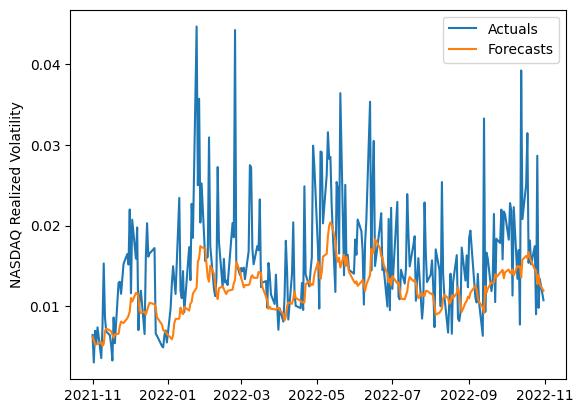

In [ ]:
# Best model
plt.plot(df_for_date["Date"], test)
plt.plot(df_for_date["Date"], true_predictions) 
plt.ylabel("NASDAQ Realized Volatility")
plt.legend(['Actuals', 'Forecasts'])

In [ ]:
forecasts=true_predictions

In [ ]:
my_df = {'Forecasts': forecasts.reshape(252)}
df = pd.DataFrame(my_df)
df.to_csv('Model 3 NASDAQ Forecasts.csv', index = True)